# 基于SVM的乳腺癌数据集分类

使用支持向量机（SVM）对乳腺癌数据集进行分类，分别使用线性核和高斯核进行分类，使用准确率、精确率、召回率、F1分数、ROC曲线等指标对模型进行评估，对模型的决策边界进行可视化，对比两种核函数的分类效果。

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 设置 matplotlib 中文显示字体
plt.rcParams['font.family'] = 'Microsoft YaHei'

## 数据集

数据集使用 [Kaggle - PRIYANKA/Breast Cancer Wisconsin](https://www.kaggle.com/datasets/priyanka841/breast-cancer-wisconsin) ，

> 数据列: id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst

- `diagnosis`：诊断结果，M代表恶性（malignant），B代表良性（benign）。
- `radius`：细胞核的半径。
- `texture`：灰度值，反映了细胞核的纹理。
- `perimeter`：细胞核的周长。
- `area`：细胞核的面积。
- `smoothness`：半径长度的变化，反映了细胞核的平滑度。
- `compactness`：周长平方除以面积减去1，反映了细胞核的紧密度。
- `concavity`：轮廓的凹部的严重程度。
- `concave points`：轮廓凹部的数量。
- `symmetry`：细胞核对称性。
- `fractal_dimension`：细胞核的分形维数，反映了细胞核的复杂度。

In [2]:
dataset = pd.read_csv("./data/breast cancer.csv")

x_columns = ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean", "concavity_mean",
             "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se"]

X = dataset.loc[:, x_columns].values
y = dataset.loc[:, "diagnosis"].values


### 数据集特征分布

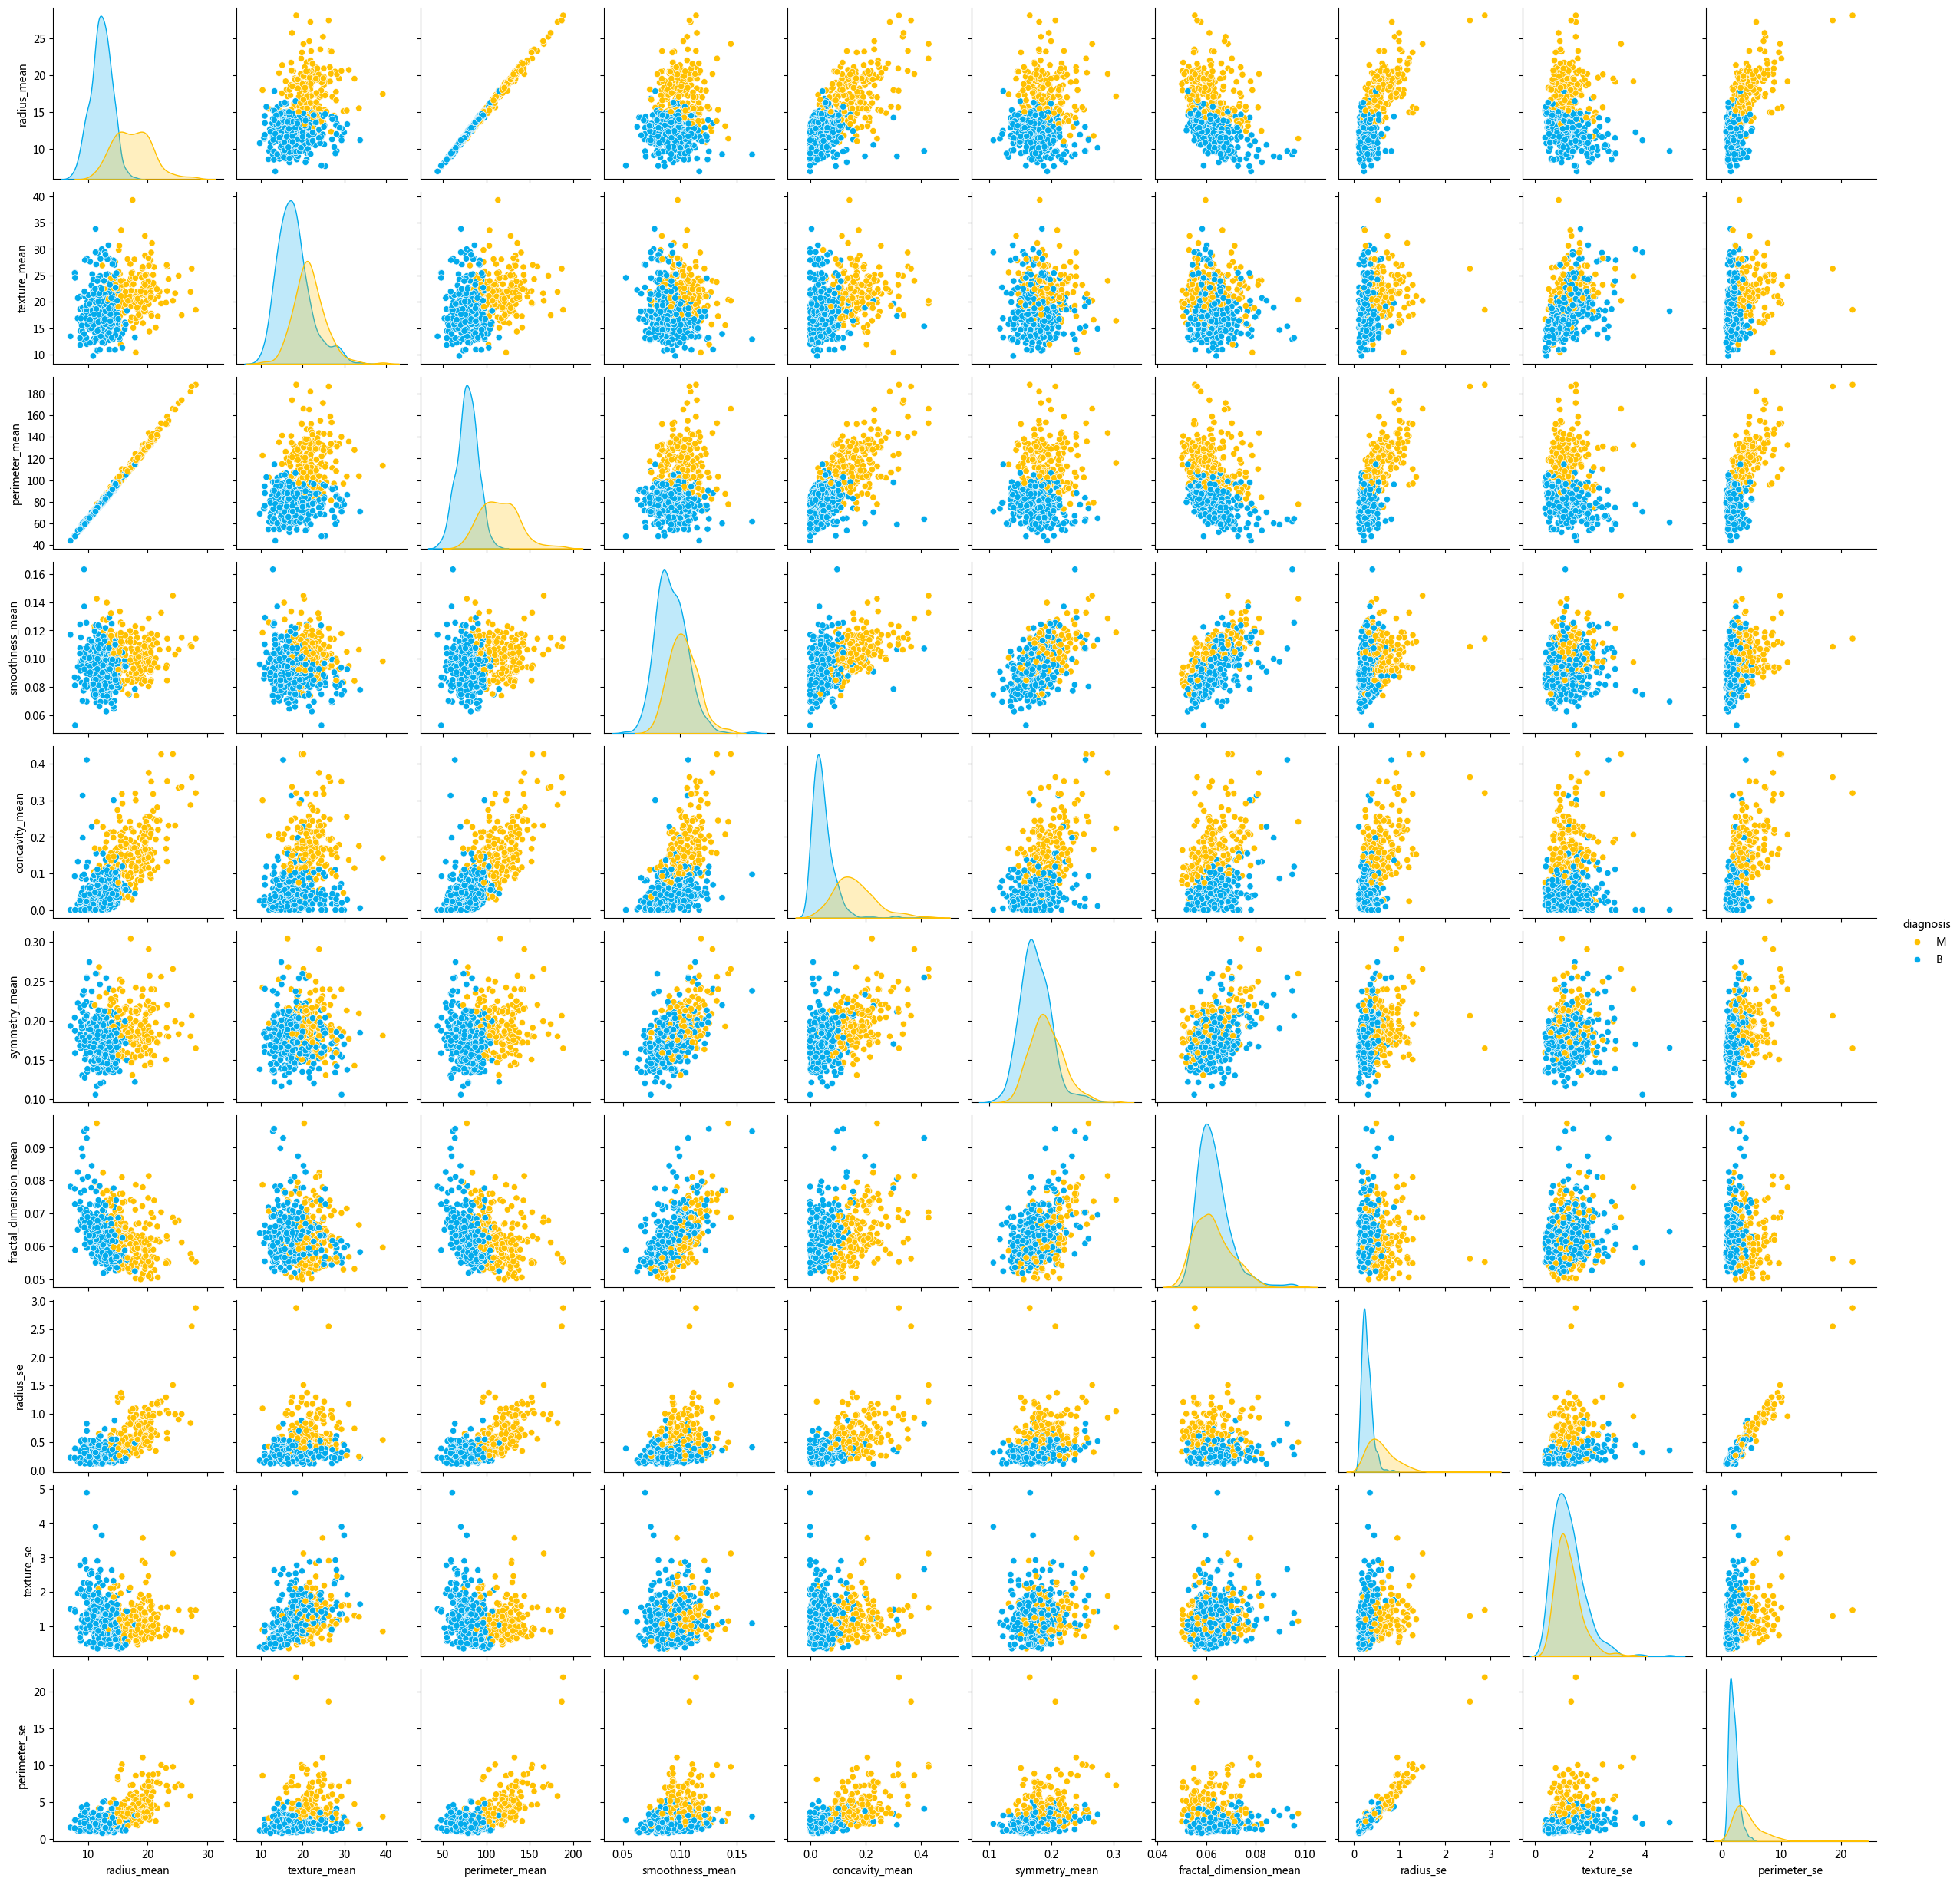

In [3]:
sns.pairplot(dataset.loc[:, [*x_columns, "diagnosis"]],hue = 'diagnosis', palette = {'M': '#FFC000', 'B': '#02ABEC'})

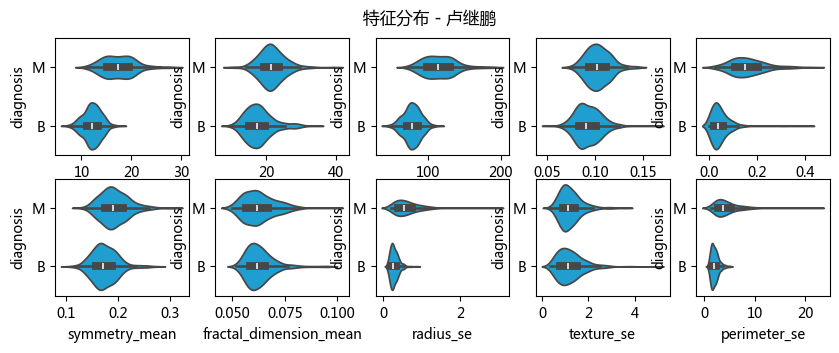

In [4]:

df = pd.DataFrame(X, columns=x_columns)
df['diagnosis'] = y

plt.figure(figsize=(10, 7))
plt.suptitle('特征分布 - 卢继鹏', position=(0.5, 0.92))

for i, col in enumerate(x_columns):
    plt.subplot(4, 5, i + 1)
    sns.violinplot(y='diagnosis', x=col, data=df, color='#02ABEC')

plt.show()

将数据集分割为训练集和测试集，其中75%的数据用于训练，25%的数据用于测试。

使用`StandardScaler`对数据进行标准化，使数据的平均值为0，标准差为1。

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 编码分类标签，将B良性编码为0，M恶性编码为1
y_train = np.where(y_train == 'M', 1, 0)
y_test = np.where(y_test == 'M', 1, 0)

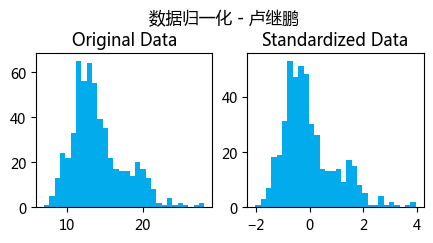

In [6]:
import matplotlib.pyplot as plt

feature_idx = 0

plt.figure(figsize=(5, 2))
plt.suptitle('数据归一化 - 卢继鹏', position=(0.5, 1.1))
plt.subplot(1, 2, 1)
plt.hist(X[:, feature_idx], bins=30, color='#02ABEC')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(X_train[:, feature_idx], bins=30, color='#02ABEC')
plt.title('Standardized Data')
plt.show()

## 线性SVM

### 构建模型

使用`scikit-learn`库中的支持向量机对数据进行训练的过程。

创建一个SVC类的实例，使用线性内核，并设置随机状态种子为0，以确保结果的可重复性。

使用`X_train`和`y_train`训练SVM分类器。

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

#### 模型决策边界

选择两个特征，使用`plot_decision_regions`绘制分类器的决策边界在这两个特征的投影。可以看到分类器在二维特征空间中的分类效果。

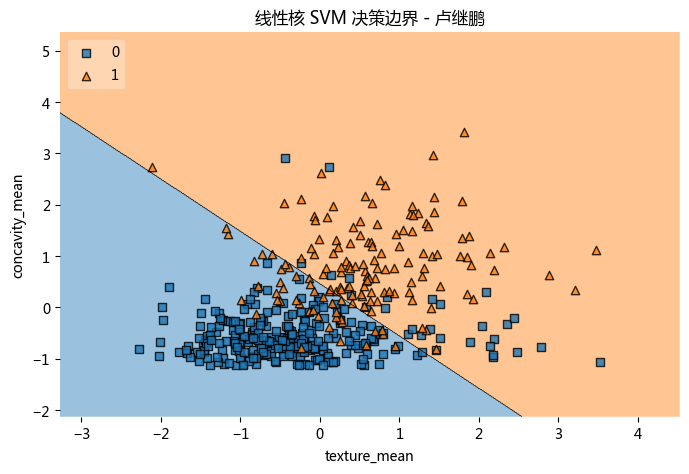

In [8]:
# 选取两个特征进行可视化

from mlxtend.plotting import plot_decision_regions
# 选择两个
# "radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se"
display_features = ['texture_mean', 'concavity_mean']

feature_idx = [x_columns.index(feature) for feature in display_features]
filter_idx = [i for i in range(X_train.shape[1]) if i not in feature_idx]

plot_decision_regions(
    X_train, y_train, clf=classifier, legend=2,
    feature_index=feature_idx,
    filler_feature_values={i: 0 for i in filter_idx},
    filler_feature_ranges={i: 3 for i in filter_idx},
    ax=plt.subplots(1, 1, figsize=(8, 5))[1]
)

plt.xlabel(display_features[0], size=10)
plt.ylabel(display_features[1], size=10)
plt.title('线性核 SVM 决策边界 - 卢继鹏', size=12)
plt.show()

### 模型评估

使用`X_test`测试集对模型进行评估。

对比预测结果`y_pred`和实际结果`y_test`，计算准确率。

In [9]:
y_pred = classifier.predict(X_test)

使用`sklearn.metrics`库中的`confusion_matrix`函数，得到混淆矩阵，可以看到模型在测试集上的分类效果。

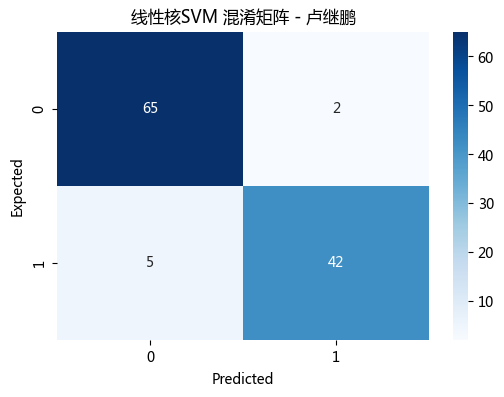

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('线性核SVM 混淆矩阵 - 卢继鹏')
plt.show()

使用`skilearn.metrics`库中的`accuracy_score`和`classification_report`等函数，得到模型的准确率、精确率、召回率、F1值等评价指标。

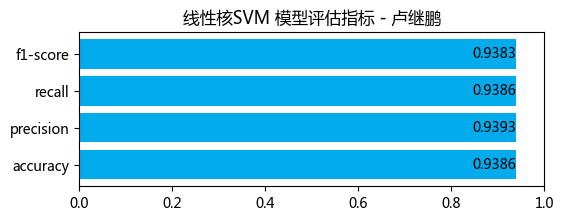

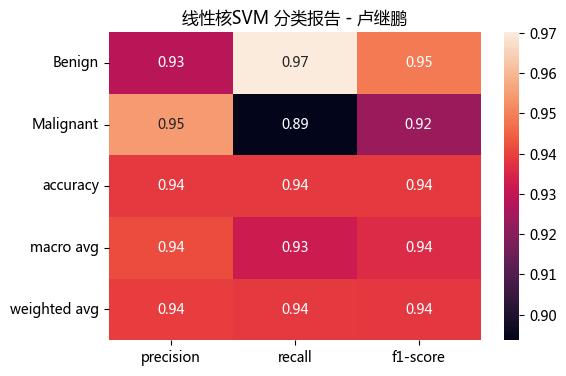

In [11]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)

fig, ax = plt.subplots(figsize=(6, 2))

metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1-score': f1score}
labels = list(metrics.keys())
values = list(metrics.values())

for idx, value in enumerate(values):
    ax.text(value, idx, f'{value:.4f}', ha='right', va='center')

bar = ax.barh(labels, values, color='#02ABEC')
# show value on plt
plt.xlim(0, 1)
plt.title('线性核SVM 模型评估指标 - 卢继鹏')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.title('线性核SVM 分类报告 - 卢继鹏')
plt.show()

使用`sklearn.metrics`库中的`roc_curve`函数，计算ROC曲线，使用`matplotlib`库绘制ROC曲线，评估模型的分类效果。

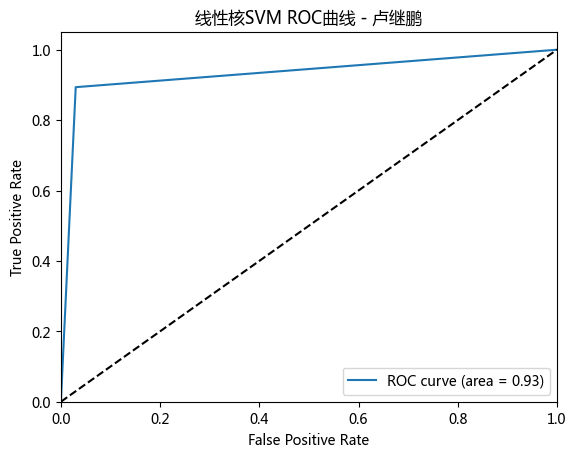

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 计算AUC
auc = roc_auc_score(y_test, y_pred)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('线性核SVM ROC曲线 - 卢继鹏')
plt.legend(loc="lower right")
plt.show()

## 高斯核SVM

### 构建模型

In [13]:
classifier_2 =SVC(kernel='rbf', random_state=0 )
classifier_2.fit(X_train, y_train)

SVC(random_state=0)

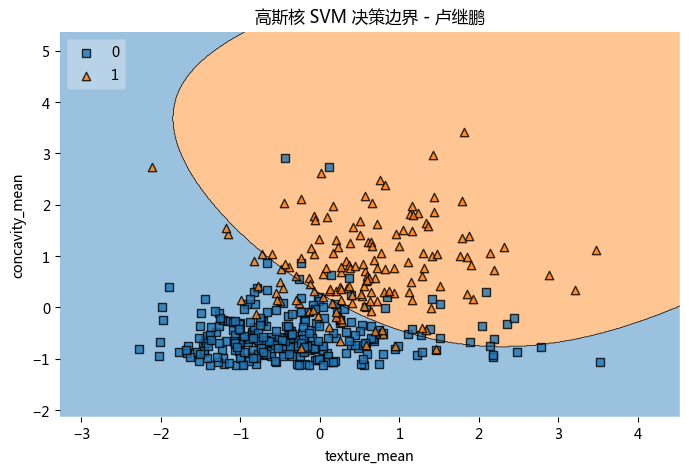

In [14]:
# 选取两个特征进行可视化

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(
    X_train, y_train, clf=classifier_2, legend=2,
    feature_index=feature_idx,
    filler_feature_values={i: 0 for i in filter_idx},
    filler_feature_ranges={i: 3 for i in filter_idx},
    ax=plt.subplots(1, 1, figsize=(8, 5))[1]
)

plt.xlabel(display_features[0], size=10)
plt.ylabel(display_features[1], size=10)
plt.title('高斯核 SVM 决策边界 - 卢继鹏', size=12)
plt.show()

### 模型评估

In [15]:
y_pred_2 = classifier_2.predict(X_test)

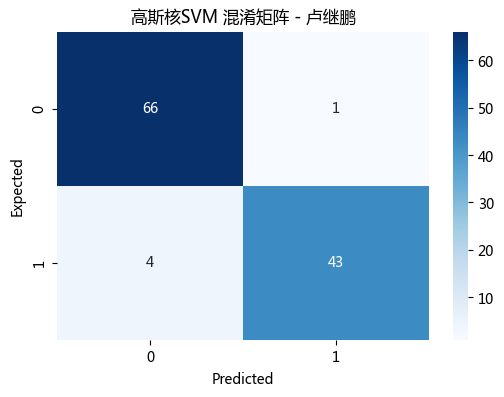

In [16]:
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(6,4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.title('高斯核SVM 混淆矩阵 - 卢继鹏')
plt.show()

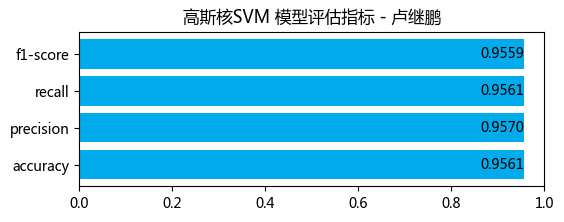

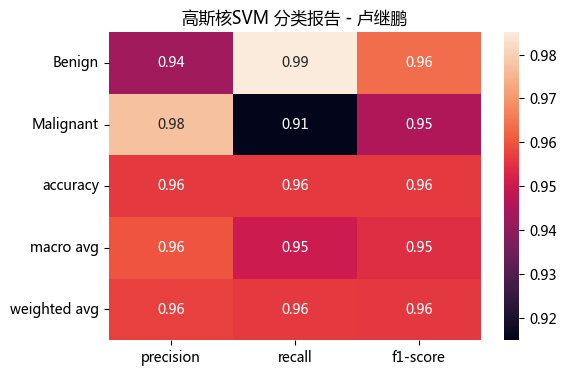

In [17]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

accuracy = accuracy_score(y_test, y_pred_2)
precision, recall, f1score, _ = precision_recall_fscore_support(y_test, y_pred_2, average='weighted')
report = classification_report(y_test, y_pred_2, target_names=['Benign', 'Malignant'], output_dict=True)

fig, ax = plt.subplots(figsize=(6, 2))

metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1-score': f1score}
labels = list(metrics.keys())
values = list(metrics.values())


for idx, value in enumerate(values):
    ax.text(value, idx, f'{value:.4f}', ha='right', va='center')


bar = ax.barh(labels, values, color='#02ABEC')

plt.xlim(0, 1)
plt.title('高斯核SVM 模型评估指标 - 卢继鹏')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.title('高斯核SVM 分类报告 - 卢继鹏')
plt.show()

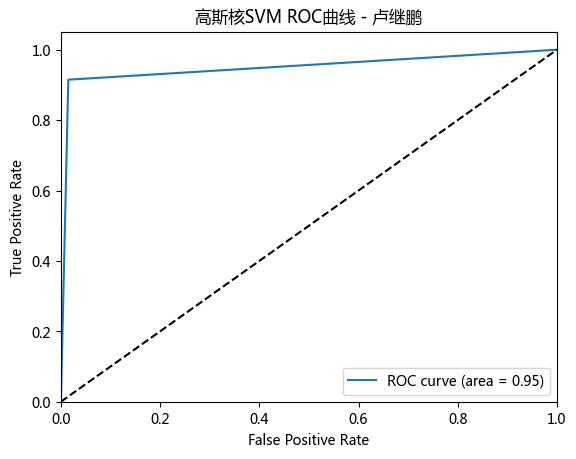

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)

# 计算AUC
auc = roc_auc_score(y_test, y_pred_2)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('高斯核SVM ROC曲线 - 卢继鹏')
plt.legend(loc="lower right")
plt.show()

## 两种模型的比较

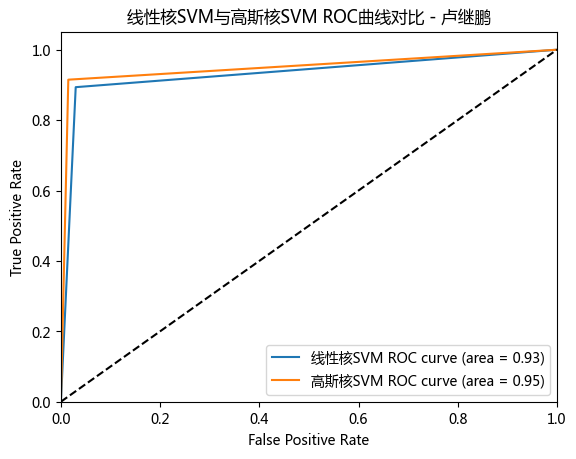

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 计算线性核SVM的ROC曲线和AUC
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred)

# 计算高斯核SVM的ROC曲线和AUC
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_2)
auc2 = roc_auc_score(y_test, y_pred_2)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr1, tpr1, label='线性核SVM ROC curve (area = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='高斯核SVM ROC curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('线性核SVM与高斯核SVM ROC曲线对比 - 卢继鹏')
plt.legend(loc="lower right")
plt.show()